In [1]:
import plotly.graph_objs as go
import numpy as np
import torch
from thesis.utils import *
from thesis.nets import *
import random
from _plotly_utils.colors.qualitative import D3 as colors

In [2]:
import plotly.io as pio
import plotly.graph_objs as go
pio.templates.default = "simple_white"
template = "simple_white"

In [3]:
layout = go.Layout(
    height = 500, width = 800,
    xaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    yaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    legend = dict(
        font = dict(size=20, color='black'),
        bgcolor = "rgba(5,5,25,0)",
        bordercolor="rgba(5,5,25,0)",
        borderwidth=1
    )
)

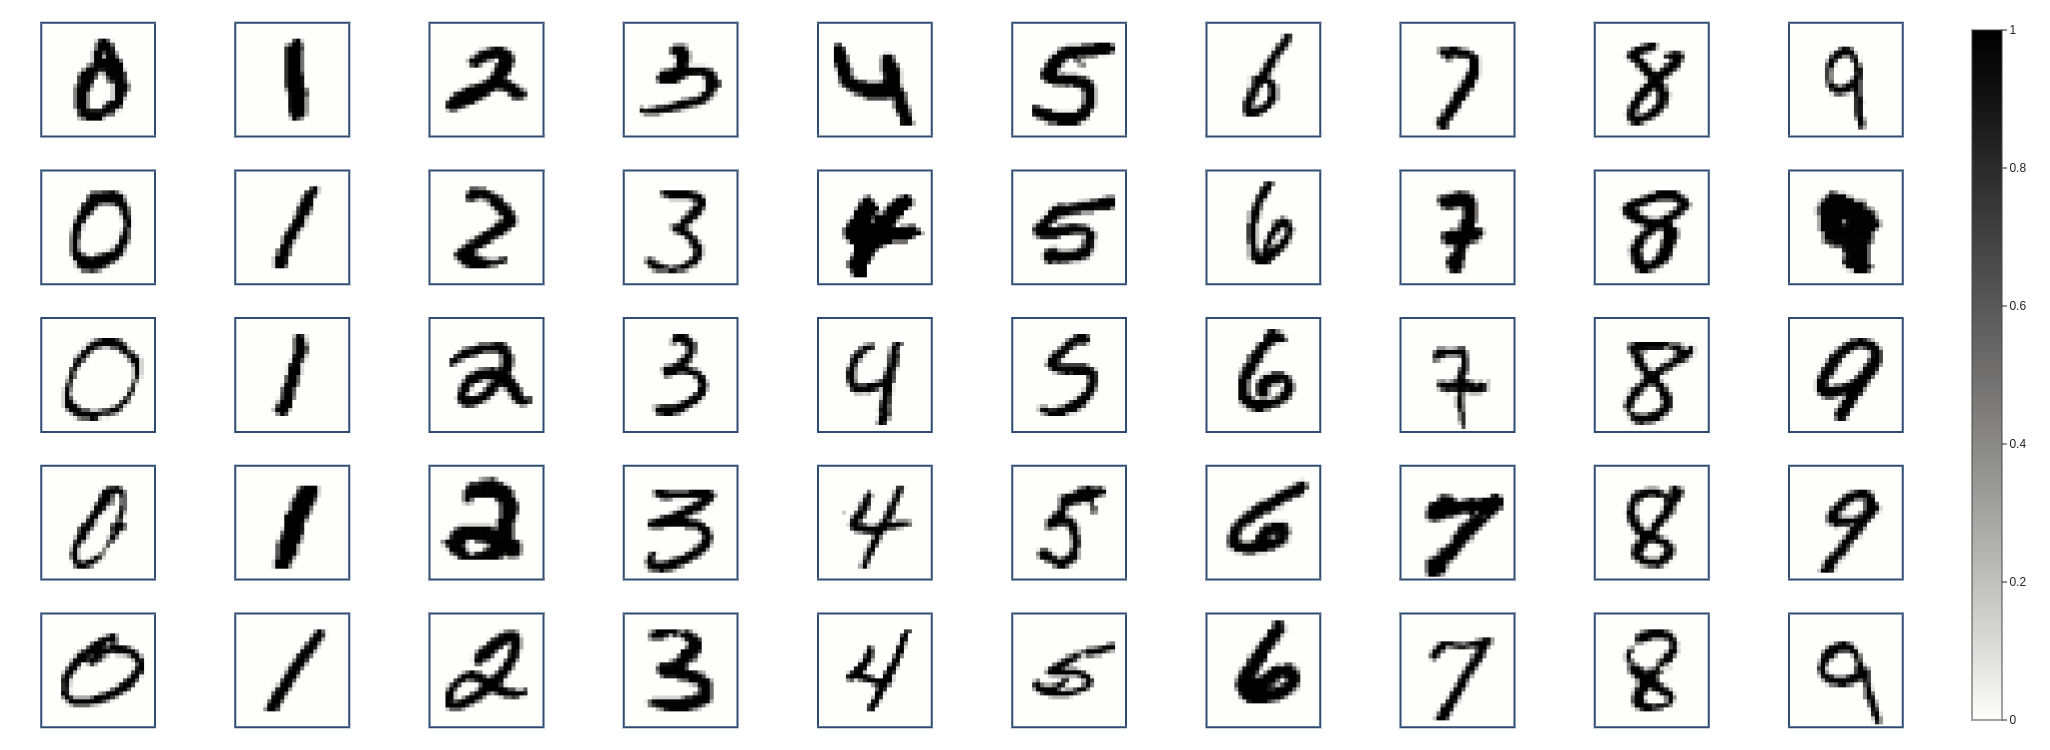

In [4]:
from torchvision.datasets import MNIST
from torchvision import transforms
dataset = MNIST(root='torchMNIST', download=False,
               transform=transforms.Compose(
                [
                    transforms.ToTensor(),
                    transforms.Lambda(lambda x: x * 1),
                ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
import plotly
fig = plotly.subplots.make_subplots(rows=5, cols=10,
                                   vertical_spacing=0.04, horizontal_spacing=0.02)
fig.update_layout(template=template)
for row in range(1, 6):
    for col in range(1, 11):
        batch = next(iter(dataloader))
        while batch[1].item() != col - 1:
            batch = next(iter(dataloader))
        fig.add_heatmap(
            x=list(range(24)), y=list(range(25)),
            z=batch[0].squeeze(0).squeeze(0).flip(0), coloraxis='coloraxis',
            row=row, col=col
        )
        fig.update_xaxes(mirror=True, linewidth=2, row=row, col=col, zeroline=False,
                         linecolor='#2e4b73', tickvals=[], ticktext=['1', '28'], range=[0, 27], scaleanchor='x', scaleratio=1, constrain="domain",
                        tickfont_size=16)
        fig.update_yaxes(mirror=True, linewidth=2, row=row, col=col, zeroline=False,
                         linecolor='#2e4b73', tickvals=[], ticktext=['1', '28'], range=[0, 27], scaleanchor='x', scaleratio=1, constrain="domain",
                        tickfont_size=16)
# fig.update_layout(layout)
fig.update_layout(height=750, width=1500, coloraxis_colorscale='gray_r',
                 margin=dict(
                 t=20, l=20, b=20, r=20))

In [5]:
fig.write_image('misc//MNIST.pdf')
fig.write_image('misc//MNIST.svg')

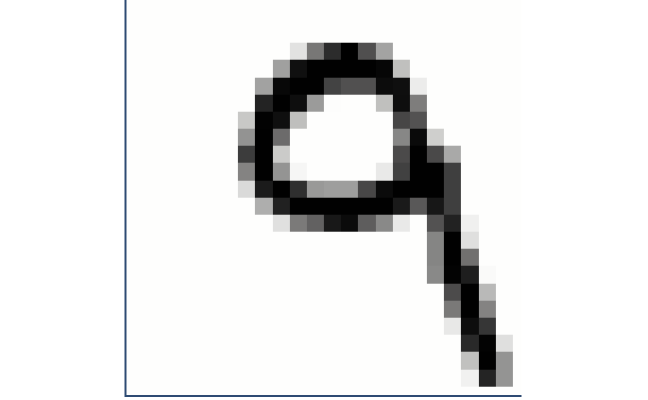

In [6]:
fig = go.Figure(layout=layout)
fig.add_heatmap(
    x=list(range(24)), y=list(range(25)),
    z=batch[0].squeeze(0).squeeze(0).flip(0), coloraxis='coloraxis',
)
fig.update_xaxes(mirror=False, linewidth=2, zeroline=False, linecolor='#2e4b73', tickvals=[], ticktext=[], range=[0, 23], scaleanchor='x', scaleratio=1, constrain="domain")
fig.update_yaxes(mirror=False, linewidth=2, zeroline=False, linecolor='#2e4b73', tickvals=[], ticktext=[], range=[0, 23], scaleanchor='x', scaleratio=1, constrain="domain")
fig.update_layout(height=400, width=400, coloraxis_colorscale='gray_r', coloraxis_showscale=False,
                 margin=dict(
                 t=0, l=0, b=0, r=0))
fig.update_layout(template=template)

In [7]:
fig.write_image('misc//MNIST_digit.pdf')
fig.write_image('misc//MNIST_digit.svg')

In [8]:
t_neg = np.linspace(-100, 0, 100)
t_pos = np.linspace(0, 100, 100)
dw_neg = -0.3 * np.exp(t_neg / 8)
dw_pos = np.exp(- t_pos / 20)

In [9]:
fig = go.Figure(layout=layout)
fig.update_layout(layout, template=template)
fig.add_scatter(x=t_neg, y=dw_neg,
                name='Негативное обновление', line_shape='spline')
fig.add_scatter(x=t_pos, y=dw_pos,
                name='Позитивное обновление', line_shape='spline')
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} с}$'
fig.layout.yaxis.title.text = '$\large{\Delta w}$'
fig.layout.legend.y = 1
fig.layout.legend.x = 0
fig.layout.margin.t = 20
fig.layout.margin.b = 80
fig.layout.margin.r = 20

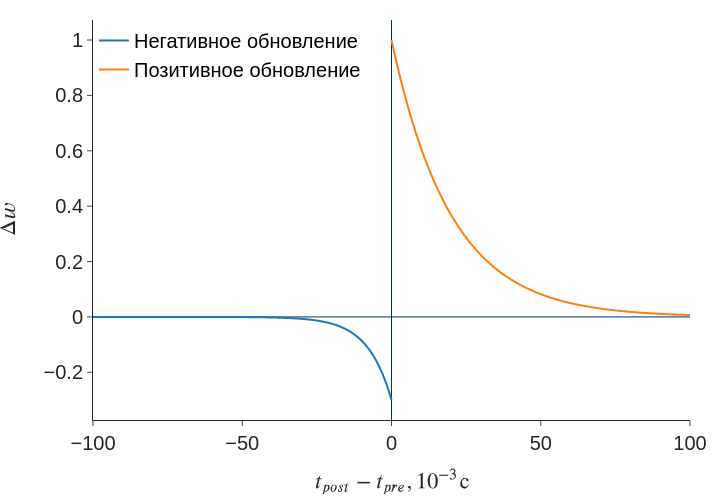

In [10]:
fig

In [11]:
fig.write_image('misc//STDP_ru.pdf')
fig.write_image('misc//STDP_ru.svg')

fig.data[0].name = 'negative update'
fig.data[1].name = 'positive update'
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} s}$'
fig.write_image('misc//STDP_eng.pdf')
fig.write_image('misc//STDP_eng.svg')

In [12]:
fig = go.Figure(layout=layout)
fig.update_layout(layout)
fig.add_scatter(x=t_neg, y=-dw_neg,
                name='Негативное обновление', line_shape='spline')
fig.add_scatter(x=t_pos, y=-dw_pos,
                name='Позитивное обновление', line_shape='spline')
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} с}$'
fig.layout.yaxis.title.text = '$\large{\Delta w}$'

fig.layout.legend.y = 1
fig.layout.legend.x = 0
fig.layout.margin.t = 20
fig.layout.margin.b = 20
fig.layout.margin.r = 20

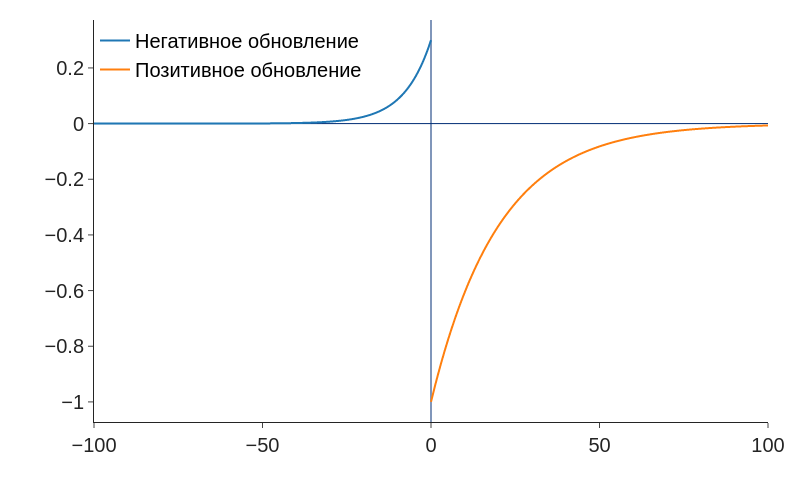

In [13]:
fig

In [14]:
fig.write_image('misc//anti-STDP_ru.pdf')
fig.write_image('misc//anti-STDP_ru.svg')

fig.data[0].name = 'negative update'
fig.data[1].name = 'positive update'
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} s}$'

fig.write_image('misc//anti-STDP_eng.pdf')
fig.write_image('misc//anti-STDP_eng.svg')

In [4]:
fig = torch.load('misc//LC_SNN-learning-curve.pt')

In [5]:
fig.update_layout(layout, template=template)
fig.update_layout(width=700, height=500)
fig.layout.yaxis.title.text = 'Accuracy, %'
fig.layout.legend.y = 0.1
fig.layout.legend.x = 0.6
# fig.layout.margin.t = 60
# fig.layout.margin.b = 20
fig.layout.margin.r = 160
# fig.layout.margin.l = 60
fig.data = [fig.data[0], fig.data[1], fig.data[3], fig.data[2]]
for i in range(4):
    fig.data[i].y = [item * 100 for item in fig.data[i].y]
    fig.data[i].error_y.array = [item * 100 for item in fig.data[i].error_y.array]
    fig.data[i].line.color = colors[i]
    fig.data[i].line.shape = "linear"
# fig.layout.xaxis.tickformat = '1'
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.range = [20, 100]
fig.layout.xaxis.range = [0, 12000]

fig.layout.xaxis.title.font.size = 30
fig.layout.xaxis.tickfont.size = 30
fig.layout.yaxis.title.font.size = 30
fig.layout.yaxis.tickfont.size = 30
fig.layout.title.font.size = 30
fig.layout.legend.font.size = 30

In [6]:
fig

FigureWidget({
    'data': [{'error_y': {'array': [1.5575750383207867, 1.2719709116170854,
                   …

In [7]:
fig.write_image('misc//LCSNN_learning_rate.pdf', height=500, width=700)
fig.write_image('misc//LCSNN_learning_rate.svg', height=500, width=700)
fig.write_image('misc//LCSNN_learning_rate.png', height=500, width=700)

fig.layout.legend.x = 0.3
fig.layout.xaxis.title.text = 'Число итераций обучения'
fig.layout.yaxis.title.text = 'Точность, %'
fig.layout.yaxis.ticksuffix = ' '

fig.layout.title.text = ''
fig.data[0].name = 'голосование патчей'
fig.data[1].name = 'общее голосование'
fig.data[2].name = 'линейный классификатор'
fig.data[3].name = 'отбор по спайкам'
fig.write_image('misc//LCSNN_learning_rate_ru.pdf', height=500, width=700)
fig.write_image('misc//LCSNN_learning_rate_ru.svg', height=500, width=700)
fig.write_image('misc//LCSNN_learning_rate_ru.png', height=500, width=700)

In [8]:
fig = torch.load('misc//C_SNN-learning-curve.pt')

In [9]:
fig.update_layout(layout, template=template)
fig.update_layout(width=700, height=500)
fig.layout.yaxis.title.text = 'Accuracy, %'
fig.layout.legend.y = 0.1
fig.layout.legend.x = 0.6
# fig.layout.margin.t = 40
# fig.layout.margin.b = 20
fig.layout.margin.r = 160
# fig.layout.margin.l = 60
for i in range(3):
    fig.data[i].y = [item * 100 for item in fig.data[i].y]
    fig.data[i].error_y.array = [item * 100 for item in fig.data[i].error_y.array]
    fig.data[i].line.color = colors[i]
    fig.data[i].line.shape = "linear"
# fig.layout.xaxis.tickformat = '1'
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.range = [20, 100]
fig.layout.xaxis.range = [0, 12000]

fig.layout.xaxis.title.font.size = 30
fig.layout.xaxis.tickfont.size = 30
fig.layout.yaxis.title.font.size = 30
fig.layout.yaxis.tickfont.size = 30
fig.layout.title.font.size = 30
fig.layout.legend.font.size = 30

In [10]:
fig

FigureWidget({
    'data': [{'error_y': {'array': [1.5732132722552274, 1.4349216006458332,
                   …

In [11]:
fig.write_image('misc//CSNN_learning_rate.pdf', height=500, width=700)
fig.write_image('misc//CSNN_learning_rate.svg', height=500, width=700)
fig.write_image('misc//CSNN_learning_rate.png', height=500, width=700)

fig.layout.legend.x = 0.3
fig.layout.xaxis.title.text = 'Число итераций обучения'
fig.layout.yaxis.title.text = 'Точность, %'
fig.layout.yaxis.ticksuffix = ' '

fig.layout.title.text = ''
fig.data[0].name = 'голосование патчей'
fig.data[1].name = 'общее голосование'
fig.data[2].name = 'линейный классификатор'
fig.write_image('misc//CSNN_learning_rate_ru.pdf', height=500, width=700)
fig.write_image('misc//CSNN_learning_rate_ru.svg', height=500, width=700)
fig.write_image('misc//CSNN_learning_rate_ru.png', height=500, width=700)

In [12]:
fig = torch.load('misc//FC_SNN-learning-curve.pt')

In [13]:
fig.update_layout(layout, template=template)
fig.update_layout(width=700, height=500)
fig.layout.yaxis.title.text = 'Accuracy, %'
fig.layout.legend.y = 0.1
fig.layout.legend.x = 0.6
# fig.layout.margin.t = 40
# fig.layout.margin.b = 20
fig.layout.margin.r = 160
# fig.layout.margin.l = 60
for i in range(3):
    fig.data[i].line.color = colors[i]
    fig.data[i].y = [item * 100 for item in fig.data[i].y]
    fig.data[i].error_y.array = [item * 100 for item in fig.data[i].error_y.array]
    fig.data[i].line.shape = "linear"
# fig.layout.xaxis.tickformat = '1'
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.range = [20, 100]
fig.layout.xaxis.range = [0, 12000]
fig.layout.yaxis.autorange = False
fig.layout.xaxis.autorange = False

fig.layout.xaxis.title.font.size = 30
fig.layout.xaxis.tickfont.size = 30
fig.layout.yaxis.title.font.size = 30
fig.layout.yaxis.tickfont.size = 30
fig.layout.title.font.size = 30
fig.layout.legend.font.size = 30

In [14]:
fig

FigureWidget({
    'data': [{'error_y': {'array': [1.30566458173606, 1.4714312760030621,
                     …

In [15]:
fig.write_image('misc//FCSNN_learning_rate.pdf', height=500, width=700)
fig.write_image('misc//FCSNN_learning_rate.svg', height=500, width=700)
fig.write_image('misc//FCSNN_learning_rate.png', height=500, width=700)

fig.layout.legend.x = 0.3
fig.layout.xaxis.title.text = 'Число итераций обучения'
fig.layout.yaxis.title.text = 'Точность, %'
fig.layout.yaxis.ticksuffix = ' '

fig.layout.title.text = ''
fig.data[0].name = 'голосование патчей'
fig.data[1].name = 'общее голосование'
fig.data[2].name = 'линейный классификатор'
fig.write_image('misc//FCSNN_learning_rate_ru.pdf', height=500, width=700)
fig.write_image('misc//FCSNN_learning_rate_ru.svg', height=500, width=700)
fig.write_image('misc//FCSNN_learning_rate_ru.png', height=500, width=700)

In [27]:
data = view_database()
data = data[data['network_type'] == 'LC_SNN']
data = data[data['n_filters'] == 100]
best_network = data.sort_values('accuracy', ascending=False)['name'].values[0]

Expecting value: line 1 column 1 (char 0)


In [28]:
net = load_network(best_network)

Created LC_SNN network 9b905a7666a70a6b2371ba1b68fa5436076b719c5bb80772e34403b3 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.32000000000000006, 'n_iter': 5000, 'c_w': -50.0, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 100, 'intensity': 127.5, 'dt': 1, 'c_l': False, 'A_pos': None, 'A_neg': None, 'tau_pos': 20.0, 'tau_neg': 20.0, 'weight_decay': None, 'train_method': None, 'immutable_name': False}



/home/dan/miniconda3/envs/bachelor/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning:

source code of class 'bindsnet.network.network.Network' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.

/home/dan/miniconda3/envs/bachelor/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning:

source code of class 'bindsnet.network.nodes.Input' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.

/home/dan/miniconda3/envs/bachelor/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning:

source code of class 'bindsnet.network.nodes.AdaptiveLIFNodes' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torc

In [29]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY.pdf')
fig.write_image('misc//weights_XY.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_ru.pdf')
fig.write_image('misc//weights_XY_ru.svg')

In [4]:
data = view_database()
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
best_network = data.sort_values('accuracy', ascending=False)['name'].values[0]
net = load_network(best_network)

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network 8f0d908db7571346ab8e257bf31fddb69bb8faccbb0574e2ee8db82b with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.32, 'n_iter': 5000, 'c_w': -50, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 100, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.3, 'A_neg': -3, 'tau_pos': 8.0, 'tau_neg': 20.0, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [5]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'a7e8362d-c9fd-493d-9f4d-c4e41325552b',…

In [6]:
fig.write_image('misc//comp_distr.pdf')
fig.write_image('misc//comp_distr.svg')

In [7]:
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'
fig.layout.title.text = ''
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'a7e8362d-c9fd-493d-9f4d-c4e41325552b',…

In [8]:
fig.write_image('misc//comp_distr_ru.pdf')
fig.write_image('misc//comp_distr_ru.svg')

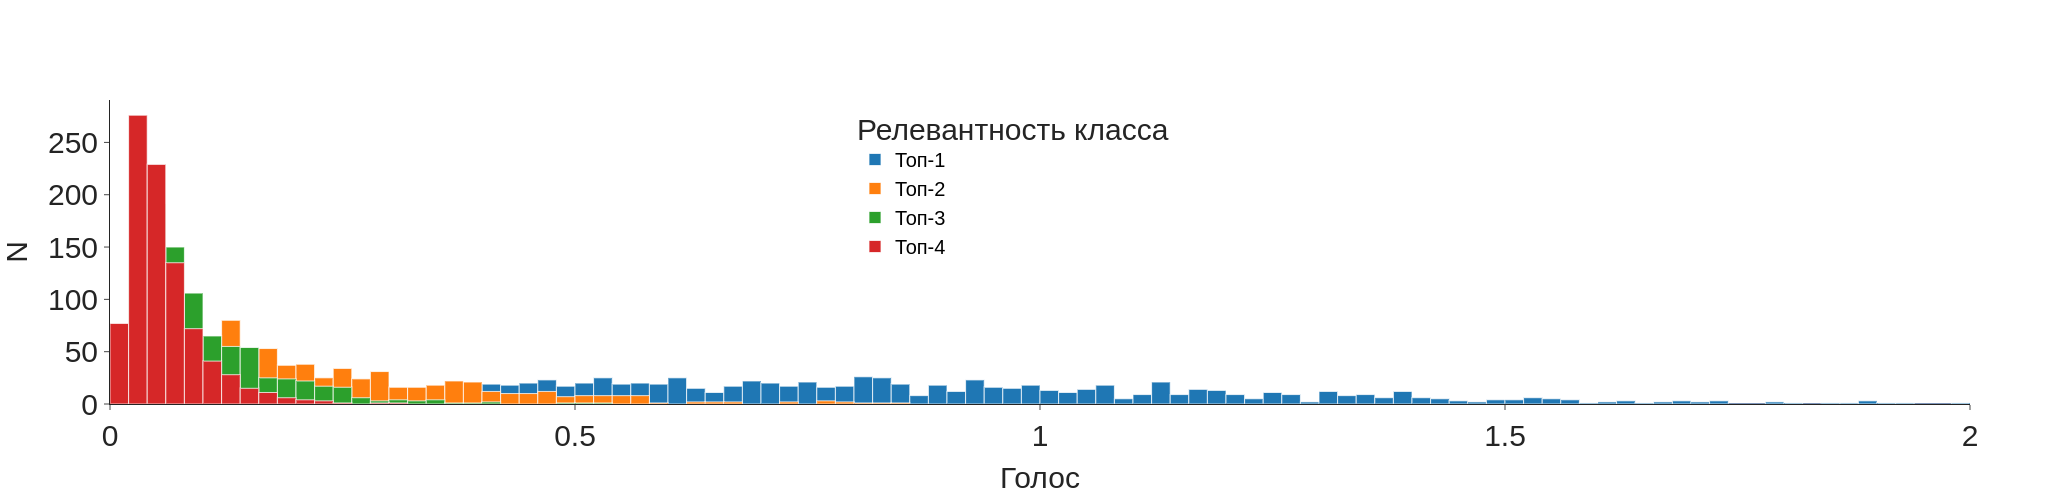

In [12]:
votes_sorted = net.votes.view(10, -1).sort(0, descending=True).values

fig = go.Figure()
# fig.update_layout(layout, template=template)
for i in range(4):
    # create the histogram
#     (n, bins, patches) = plt.hist(votes_sorted[i, :], bins=20, label='hst')
#     fig.add_scatter(x=bins, y=n)
    fig.add_trace(go.Histogram(x=votes_sorted[i, :], opacity=1, name=f"Топ-{i+1}",
                               xbins=dict(size=0.02
    ),))
fig.update_layout(layout, template=template, barmode='overlay', legend_title_text="Релевантность класса",
                  legend_title_font_size=30,
                  legend_x=0.4,
                  xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30,  yaxis_tickfont_size=30, xaxis_range=[0, 2],
#                   xaxis_ticktext_font_size=30,
                 xaxis_title_text="Голос", yaxis_title_text="N")

In [13]:
fig.write_image('misc//votes_distr_4_ru.pdf')
fig.write_image('misc//votes_distr_4_ru.svg')

In [37]:
w, fig = net.accuracy_distribution()
fig.layout.xaxis.range = [0, 9.5]
fig.layout.yaxis.range = [0.7, 1]
fig.update_layout(layout, template=template)
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.zeroline = False

In [38]:
fig

FigureWidget({
    'data': [{'error_y': {'array': array([0.00351738, 0.00477236, 0.01007173, 0.01018094, 0.011…

In [39]:
fig.write_image('misc//acc_distr.pdf')
fig.write_image('misc//acc_distr.svg')

In [40]:
fig.layout.xaxis.title.text = 'Метка'
fig.layout.yaxis.title.text = 'Точность'
fig.layout.title.text = ''

In [41]:
fig.write_image('misc//acc_distr_ru.pdf')
fig.write_image('misc//acc_distr_ru.svg')

In [42]:
fig = net.votes_distribution()
fig.update_layout(layout, template=template)
fig.layout.yaxis.zeroline = False
fig.layout.xaxis.zeroline = False

In [43]:
fig

FigureWidget({
    'data': [{'error_y': {'array': array([1.2934201 , 0.65735716, 0.42495543, 0.25497413, 0.235…

In [44]:
fig.write_image('misc//votes_distr.pdf')
fig.write_image('misc//votes_distr.svg')

In [45]:
fig.layout.xaxis.title.text = 'Значимость класса'
fig.layout.yaxis.title.text = 'Средний голос'
fig.layout.title.text = ''

In [46]:
fig.write_image('misc//votes_distr_ru.pdf')
fig.write_image('misc//votes_distr_ru.svg')

In [47]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
net = load_network(data.sort_values('accuracy').iloc[-1]['name'])

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [48]:
fig = net.plot_votes()
fig.update_layout(layout, template=template)
fig.data[0].colorbar.title.font.size = 20
fig.data[0].colorbar.tickfont.size = 20
fig.layout.margin.l = 30
fig.layout.margin.t = 40
fig.layout.margin.b = 40
fig.layout.margin.r = 0
fig.layout.height = 300
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 20}, 'title': {'font': {'size': 20}, 'text': 'V…

In [49]:
fig.write_image('misc//votes.pdf')
fig.write_image('misc//votes.svg')

In [50]:
fig.layout.xaxis.title.text = 'Индекс Y нейрона'
fig.layout.yaxis.title.text = 'Метка класса'
fig.data[0].colorbar.title = 'Голос'
fig.data[0].colorbar.title.font.size = 20
fig.layout.title.text = ''

In [51]:
fig.write_image('misc//votes_ru.pdf')
fig.write_image('misc//votes_ru.svg')

In [52]:
fig = net.votes_distribution()
fig.update_layout(layout, template=template)
fig.layout.height = 250
fig.layout.yaxis.zeroline = False
fig

FigureWidget({
    'data': [{'error_y': {'array': array([2.2396517 , 1.2031698 , 0.75150585, 0.7565857 , 0.539…

In [53]:
fig.write_image('misc//votes_distribution.pdf')
fig.write_image('misc//votes_distribution.svg')

In [54]:
fig.layout.xaxis.title.text = 'Релевантость класса'
fig.layout.yaxis.title.text = 'Средний голос'
fig.layout.title.text = ''

In [55]:
fig.write_image('misc//votes_distribution_ru.pdf')
fig.write_image('misc//votes_distribution_ru.svg')

In [56]:
net = LC_SNN(n_filters=100)
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

Created LC_SNN network fe59ca27f49ca707f2aa10abad22f3b41fded0f009913aeea65d1191 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.4, 'n_iter': 0, 'c_w': -100.0, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 100, 'intensity': 127.5, 'dt': 1, 'c_l': False, 'A_pos': None, 'A_neg': None, 'tau_pos': 20.0, 'tau_neg': 20.0, 'weight_decay': None, 'train_method': None, 'immutable_name': False}



FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'W…

In [57]:
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [58]:
fig.write_image('misc//weights_XY_untrained.pdf')
fig.write_image('misc//weights_XY_untrained.svg')

In [59]:
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [60]:
fig.write_image('misc//weights_XY_untrained_ru.pdf')
fig.write_image('misc//weights_XY_untrained_ru.svg')

In [61]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['c_l'] == False]
data = data[data['mean_weight'] < 0.55]
data = data[data['c_w'] > -20]
data = data[data['network_type'] == 'LC_SNN']
name = data.sort_values('accuracy').iloc[0]['name']

Expecting value: line 1 column 1 (char 0)


In [62]:
net = load_network(name)
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

Created LC_SNN network 34e193d8b98d36929b5af9d4a3aa154e510f825ff780d94758cbcb2b with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.4, 'n_iter': 4000, 'c_w': -10, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': False, 'A_pos': None, 'A_neg': None, 'tau_pos': 20.0, 'tau_neg': 20.0, 'weight_decay': None, 'train_method': None, 'immutable_name': False}



In [63]:
fig.write_image('misc//weights_XY_bad.pdf')
fig.write_image('misc//weights_XY_bad.svg')

In [64]:
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [65]:
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [66]:
fig.write_image('misc//weights_XY_bad_ru.pdf')
fig.write_image('misc//weights_XY_bad_ru.svg')

In [67]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
name = data.sort_values('accuracy', ascending=False).iloc[0]['name']
net = load_network(name)

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [68]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'W…

In [69]:
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [70]:
fig.write_image('misc//weights_XY_good.pdf')
fig.write_image('misc//weights_XY_good.svg')

In [71]:
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [72]:
fig.write_image('misc//weights_XY_good_ru.pdf')
fig.write_image('misc//weights_XY_good_ru.svg')

In [18]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
name = data.sort_values('accuracy', ascending=False).iloc[0]['name']
net = load_network(name)
max_comp = net.network.connections[('Y', 'Y')].w.min().item()

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [19]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy:.1%}'
fig.layout.title.font.size = 30
fig.layout.margin.t = 80
fig.layout.xaxis.range = [-700, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'b7f7a719-1f2b-4917-b662-a42c7589cb61',…

In [20]:
anti_stdp = r"$\tau_{+\}=" + f"{net.tau_pos:.1f}$, " + r"$\tau_{-\}=" + f"{net.tau_neg:.1f}$, " + r"$\A_{+\}=" + f"{net.A_pos:.1f}$, " + r"$\A_{+\}=" + f"{net.A_neg:.1f}$"
print(anti_stdp)

$\tau_{+\}=17.7$, $\tau_{-\}=16.5$, $\A_{+\}=-0.1$, $\A_{+\}=-1.6$


In [21]:
fig.write_image('misc//competition_distribution_best.pdf')
fig.write_image('misc//competition_distribution_best.svg')

In [22]:
fig.layout.title.text = f'Точность: {net.accuracy:.1%}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [23]:
fig.write_image('misc//competition_distribution_best_ru.pdf')
fig.write_image('misc//competition_distribution_best_ru.svg')

In [24]:
fig = net.draw_competitions(12, max_comp)
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text=""
                 )
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_best.pdf')
fig.write_image(f'misc//competition_on_XY_best.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_best_ru.pdf')
fig.write_image(f'misc//competition_on_XY_best_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [25]:
name = data.sort_values('accuracy', ascending=False).iloc[-1]['name']
net = load_network(name)

Created LC_SNN network weight_decay_pos-3e1e8fc7efa3b08377aad1964d7ece34d0eb7e734e2192f77e459a7d with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.47, 'n_iter': 5000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.5340670910619911, 'A_neg': -1.5153109003926835, 'tau_pos': 14.739958044130061, 'tau_neg': 14.154697593240293, 'weight_decay': -0.0009000000427477062, 'train_method': None, 'immutable_name': True}



In [26]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy:.1%}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig.layout.xaxis.range = [-8, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'e5ea8006-131f-49b5-b394-bd0e62db0df7',…

In [27]:
anti_stdp = r"$\tau_{+\}=" + f"{net.tau_pos:.1f}$, " + r"$\tau_{-\}=" + f"{net.tau_neg:.1f}$, " + r"$\A_{+\}=" + f"{net.A_pos:.1f}$, " + r"$\A_{+\}=" + f"{net.A_neg:.1f}$"
print(anti_stdp)

$\tau_{+\}=14.7$, $\tau_{-\}=14.2$, $\A_{+\}=-0.5$, $\A_{+\}=-1.5$


In [28]:
fig.write_image('misc//competition_distribution_worst.pdf')
fig.write_image('misc//competition_distribution_worst.svg')

In [29]:
fig.layout.title.text = f'Точность: {net.accuracy:.1%}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [30]:
fig.write_image('misc//competition_distribution_worst_ru.pdf')
fig.write_image('misc//competition_distribution_worst_ru.svg')

In [31]:
fig = net.draw_competitions(12, max_comp)
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text=""
                 )
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_worst.pdf')
fig.write_image(f'misc//competition_on_XY_worst.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_worst_ru.pdf')
fig.write_image(f'misc//competition_on_XY_worst_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [32]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
data = data[data['accuracy'] < 0.7]
data = data[data['accuracy'] > 0.5]
name = data.sort_values('accuracy', ascending=False).iloc[len(data)//2]['name']
net = load_network(name)

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network 66404d1b316e2594d9f9ec8647b3ff3fbffd10228f24802a111022b1 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -1.9008609641777172, 'A_neg': -1.5871087635095806, 'tau_pos': 17.57689766888219, 'tau_neg': 24.475381830304222, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



/home/dan/miniconda3/envs/bachelor/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning:

source code of class 'bindsnet.network.network.Network' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.

/home/dan/miniconda3/envs/bachelor/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning:

source code of class 'bindsnet.network.nodes.Input' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.



In [33]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy:.1%}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30

fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '817b5ab5-e0c7-439f-b2ba-f2b649419547',…

In [34]:
anti_stdp = r"$\tau_{+\}=" + f"{net.tau_pos:.1f}$, " + r"$\tau_{-\}=" + f"{net.tau_neg:.1f}$, " + r"$\A_{+\}=" + f"{net.A_pos:.1f}$, " + r"$\A_{+\}=" + f"{net.A_neg:.1f}$"
print(anti_stdp)

$\tau_{+\}=17.6$, $\tau_{-\}=24.5$, $\A_{+\}=-1.9$, $\A_{+\}=-1.6$


In [35]:
fig.write_image('misc//competition_distribution_medium_good.pdf')
fig.write_image('misc//competition_distribution_medium_good.svg')

In [36]:
fig.layout.title.text = f'Точность: {net.accuracy:.1%}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [37]:
fig.write_image('misc//competition_distribution_medium_good_ru.pdf')
fig.write_image('misc//competition_distribution_medium_good_ru.svg')

In [38]:
fig = net.draw_competitions(12, max_comp)
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_medium_good.pdf')
fig.write_image(f'misc//competition_on_XY_medium_good.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_medium_good_ru.pdf')
fig.write_image(f'misc//competition_on_XY_medium_good_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [39]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
data = data[data['accuracy'] < 0.5]
data = data[data['accuracy'] > 0.3]
name = data.sort_values('accuracy', ascending=False).iloc[len(data)//2]['name']
net = load_network(name)

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network 3664d4dfe29edf6af64a96445f188d98b7f745c2aa9d83c73b45b3e0 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -1.2326585379137385, 'A_neg': -0.5819412528943878, 'tau_pos': 5.39817965549843, 'tau_neg': 15.14567319548371, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



/home/dan/miniconda3/envs/bachelor/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning:

source code of class 'bindsnet.network.network.Network' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.

/home/dan/miniconda3/envs/bachelor/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning:

source code of class 'bindsnet.network.nodes.Input' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.



In [40]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy:.1%}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '408587e3-275b-4f28-bea7-085a9f932b5d',…

In [41]:
anti_stdp = r"$\tau_{+\}=" + f"{net.tau_pos:.1f}$, " + r"$\tau_{-\}=" + f"{net.tau_neg:.1f}$, " + r"$\A_{+\}=" + f"{net.A_pos:.1f}$, " + r"$\A_{+\}=" + f"{net.A_neg:.1f}$"
print(anti_stdp)

$\tau_{+\}=5.4$, $\tau_{-\}=15.1$, $\A_{+\}=-1.2$, $\A_{+\}=-0.6$


In [42]:
fig.write_image('misc//competition_distribution_medium_bad.pdf')
fig.write_image('misc//competition_distribution_medium_bad.svg')

In [43]:
fig.layout.title.text = f'Точность: {net.accuracy:.1%}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [44]:
fig.write_image('misc//competition_distribution_medium_bad_ru.pdf')
fig.write_image('misc//competition_distribution_medium_bad_ru.svg')

In [45]:
fig = net.draw_competitions(12, max_comp)
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")
fig.write_image(f'misc//competition_on_XY_medium_bad.pdf')
fig.write_image(f'misc//competition_on_XY_medium_bad.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_medium_bad_ru.pdf')
fig.write_image(f'misc//competition_on_XY_medium_bad_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [97]:
from bindsnet.network import Network
from bindsnet.network.topology import Connection, LocalConnection
from bindsnet.network.nodes import McCullochPitts, IFNodes, LIFNodes, AdaptiveLIFNodes, Input

In [98]:
network = Network(learning=True)

In [99]:
n_input = 20 * 20
conv_size = int((20 - 12 + 2 * 0) / 2) + 1
n_filters = 25
n_output = n_filters * conv_size * conv_size 
output_shape = int(np.sqrt(n_output))
time_max = 250
thresh = -50
rest = -60
reset = -65
tc_decay = 100.
theta_decay = 100.
theta_plus = 5
refrac = 10

In [100]:
input_layer = Input(n=20*20, shape=(1, 20, 20))
thresh_nodes = McCullochPitts(n=n_output, shape=(n_filters, conv_size, conv_size), rest=0, thresh=1)
if_nodes = IFNodes(n=n_output, shape=(n_filters, conv_size, conv_size), rest=rest, reset=reset, thresh=thresh, refrac=refrac)
lif_nodes = LIFNodes(n=n_output, shape=(n_filters, conv_size, conv_size), rest=rest, reset=reset, thresh=thresh, refrac=refrac, tc_decay=tc_decay)
alif_nodes = AdaptiveLIFNodes(n=n_output, shape=(n_filters, conv_size, conv_size), rest=rest, reset=reset, tc_decay=tc_decay, thresh=thresh, refrac=refrac,
                              theta_plus=theta_plus, tc_theta_decay=theta_decay, learning=True)

In [101]:
thresh_connection = LocalConnection(input_layer, thresh_nodes, n_filters=25, kernel_size=12, stride=2,
                                   )
if_connection = LocalConnection(input_layer, if_nodes, n_filters=25, kernel_size=12, stride=2,
                               )
lif_connection = LocalConnection(input_layer, lif_nodes, n_filters=25, kernel_size=12, stride=2,
                                )
alif_connection = LocalConnection(input_layer, alif_nodes, n_filters=25, kernel_size=12, stride=2,
                                 )

In [102]:
network.add_layer(input_layer, name="input")
network.add_layer(thresh_nodes, name="thresh")
network.add_layer(if_nodes, name="if")
network.add_layer(lif_nodes, name="lif")
network.add_layer(alif_nodes, name="alif")

In [103]:
network.add_connection(thresh_connection, source='input', target='thresh')
network.add_connection(if_connection, source='input', target='if')
network.add_connection(lif_connection, source='input', target='lif')
network.add_connection(alif_connection, source='input', target='alif')

In [104]:
from bindsnet.network.monitors import Monitor

In [105]:
monitors = {}
for l in network.layers:
    if l == 'input':
        continue
    monitors[l] = Monitor(network.layers[l], state_vars=['s', 'v'], time=250)
    network.add_monitor(monitors[l], name=f'monitor_{l}')

In [106]:
from bindsnet.datasets import MNIST
from bindsnet.encoding import PoissonEncoder
from torchvision import transforms

In [107]:
encoded_dataset = MNIST(
    PoissonEncoder(time=250, dt=1),
    None,
    ".//MNIST",
    download=False,
    train=True,
    transform=transforms.Compose(
        [
            transforms.CenterCrop(20),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x * 30),
        ]
    ),
)
train_dataset = encoded_dataset
train_dataset.data = encoded_dataset.data[:10, :, :]

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=1, shuffle=True
)
train_iter = iter(train_dataloader)

In [108]:
batch = next(train_iter)

In [109]:
inpts = {'input': batch['encoded_image'].transpose(0, 1)}

In [110]:
network.reset_()
network.run(inpts=inpts, time=250)

In [111]:
def plot_activity(layer, index):
    v = (
        monitors[layer]
        .get("v")
        .squeeze(1)
        .view(time_max, -1)[:, index]
    )
    total_spikes = (
        monitors[layer].get("s").sum(0).squeeze(0).flatten()[index]
    )
    text = f"Total spikes: {total_spikes.item()}"
    spike_timings = (
        monitors[layer]
        .get("s")
        .squeeze(1)
        .view(time_max, -1)[:, index]
        .nonzero()
        .squeeze(1)
    ).long()
    title_text = f"Neuron {index} voltage<br>{text}"

    threshes = [thresh for i in range(250)]
    if layer == 'thresh':
        threshes = [1 for i in range(250)]
    if layer == 'alif':
        threshes = []
        theta = 0
        tc_theta_decay = torch.exp(
            -1 / torch.tensor(theta_decay)
        ).float().item()
        spikes = monitors[layer].get('s').squeeze(1).view(250, -1)[:, index]
        for s in spikes:
            theta *= tc_theta_decay
            if s:
                theta += theta_plus
            threshes.append(thresh + theta)
    v[spike_timings] = torch.tensor(threshes).float()[spike_timings - 1]
    subplot_voltage = go.Scatter(
        x=list(range(time_max)),
        y=v,
        line=dict(color=colors[0], width=1),
        mode="lines", line_shape='hv'
    )
    subplot_spikes = go.Scatter(
        x=spike_timings,
        y=torch.tensor(threshes)[spike_timings - 1],
        mode="markers",
        marker=dict(color=colors[1]),
    )

    fig = go.Figure()
    fig.update_layout(layout, template=template)
    fig.update_layout(
        legend_orientation='h', legend_font_size=18,
        title_text=title_text,
        xaxis_title_text="Time",
        yaxis_title_text="Voltage",
    )
    if layer == 'thresh':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[0, 0], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=[0, time_max], y=[1, 1], name = 'Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.layout.yaxis.zeroline = False

    elif layer == 'alif':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name = 'Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
        fig.add_trace(go.Scatter(x=[0, time_max], y=[rest, rest],name='Resting potential',
                                 line=dict(color=colors[4], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
    elif layer == 'lif':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=[0, time_max], y=[thresh, thresh], name = 'Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
        fig.add_trace(go.Scatter(x=[0, time_max], y=[rest, rest], name='Resting potential',
                                 line=dict(color=colors[4], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
    elif layer == 'if':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name='Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
    fig.add_trace(subplot_voltage)
    fig.data[-1].name = 'Voltage'
    fig.add_trace(subplot_spikes)
    fig.data[-1].name = 'Spikes'
   
    fig.layout.legend.y = -0.3
    fig.layout.legend.x = 0
    fig.layout.showlegend = True
    fig.layout.xaxis.zeroline = False
    fig.layout.yaxis.zeroline = False
    fig.update_layout(height=600, width=900)
    return fig

<ipython-input-111-688dfcf67ded>:13: UserWarning:

This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629395347/work/torch/csrc/utils/python_arg_parser.cpp:766.)



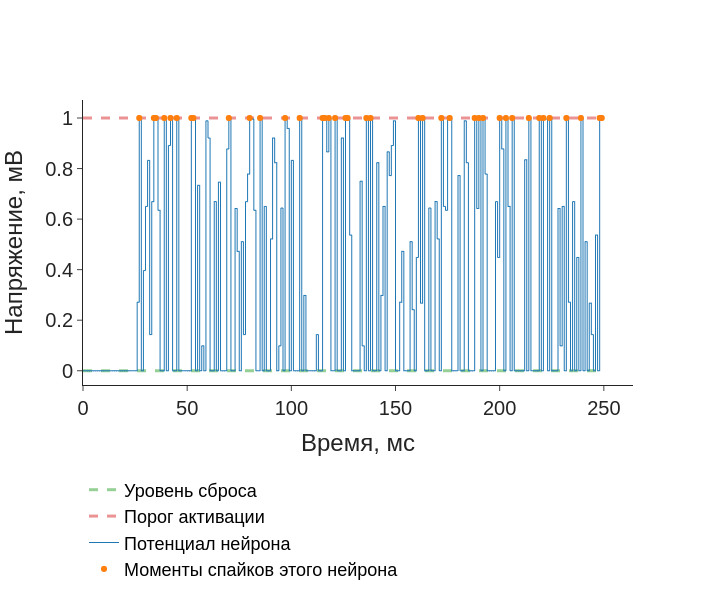

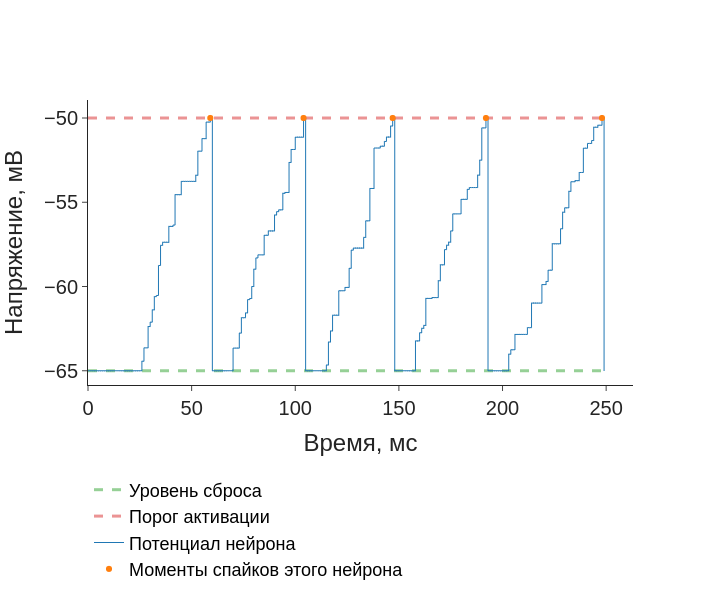

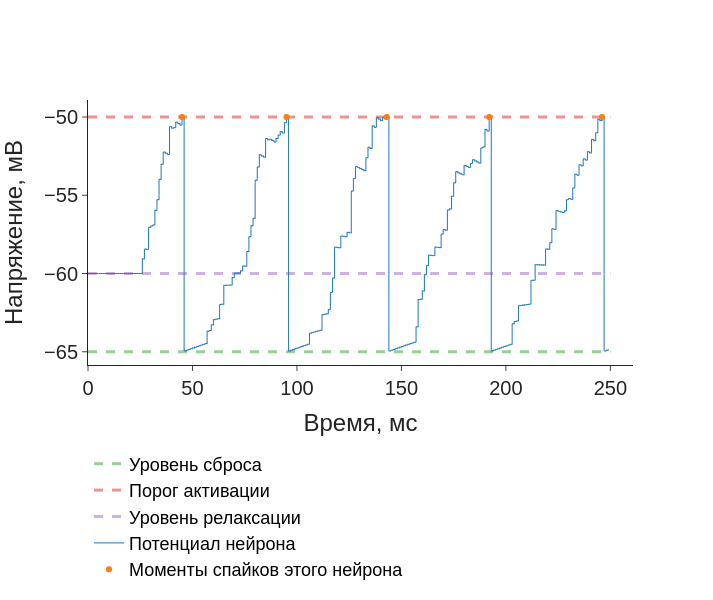

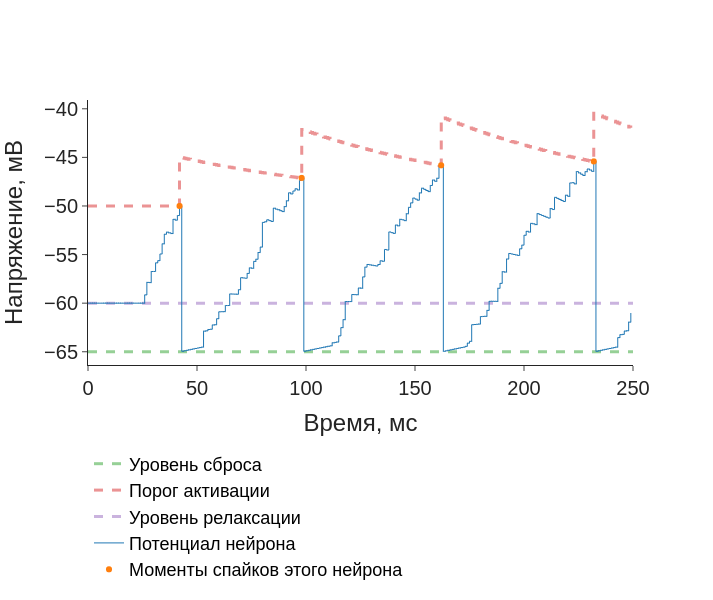

In [112]:
for layer in network.layers:
    if layer == 'input':
        continue
    fig = plot_activity(layer, 0)
    fig.layout.title.text = layer
    fig.write_image(f'misc//model_{layer}.pdf')
    fig.write_image(f'misc//model_{layer}.svg')
    
    fig.layout.title.text = ''
    fig.layout.xaxis.title.text = 'Время, мс'
    fig.layout.yaxis.title.text = 'Напряжение, мВ'
    fig.data[0].name = 'Уровень сброса'
    fig.data[1].name = 'Порог активации'
    fig.data[-1].name = 'Моменты спайков этого нейрона'
    fig.data[-2].name = 'Потенциал нейрона'
    if layer == 'alif' or layer == 'lif':
        fig.data[2].name = 'Уровень релаксации'
        
    fig.write_image(f'misc//model_{layer}_ru.pdf')
    fig.write_image(f'misc//model_{layer}_ru.svg')
    fig.show()

In [113]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
name = data.sort_values('accuracy', ascending=False).iloc[0]['name']
net = load_network(name)
net.network.layers['Y'].rest = torch.tensor(-60.)
net.network.layers['Y'].refrac = torch.tensor(0.1)

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [114]:
net.feed_label(1)
reset = net.network.layers['Y'].reset
rest = net.network.layers['Y'].rest
thresh = net.network.layers['Y'].thresh
time_max = net.time_max
title_text = ''
index = net.best_voters.indices[0]
v = (
    net.voltages['Y']
    .get("v")
    .squeeze(1)
    .view(time_max, -1)[:, index]
)

spike_timings = (
    net.spikes['Y']
    .get("s")
    .squeeze(1)
    .view(time_max, -1)[:, index]
    .nonzero()
    .squeeze(1)
)

threshes = []
theta = 0
theta_plus = net.network.layers['Y'].theta_plus
tc_theta_decay = net.network.layers['Y'].tc_theta_decay

spikes = net.spikes['Y'].get('s').squeeze(1).view(250, -1)[:, index]

for s in spikes:
    theta *= tc_theta_decay
    if s:
        theta += theta_plus
    threshes.append(thresh + theta)
    
v[spike_timings] = torch.tensor(threshes)[spike_timings - 1]
subplot_voltage = go.Scatter(
    x=list(range(time_max)),
    y=v,
    line=dict(color=colors[0], width=1),
    mode="lines", line_shape='hv'
)

subplot_spikes = go.Scatter(
    x=spike_timings,
    y=torch.tensor(threshes)[spike_timings - 1],
    mode="markers",
    marker=dict(color=colors[1]),
)

fig = go.Figure()
fig.update_layout(layout, template=template)
fig.update_layout(
    legend_orientation='h', legend_font_size=18,
    title_text=title_text,
    xaxis_title_text="Time",
    yaxis_title_text="Voltage",
)

fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name = 'Activation threshhold',
                         line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))



fig.add_trace(subplot_voltage)
fig.data[-1].name = 'Voltage'
fig.add_trace(subplot_spikes)
fig.data[-1].name = 'Spikes'

fig.layout.legend.y = -0.3
fig.layout.legend.x = 0
fig.layout.showlegend = True

Prediction: 1


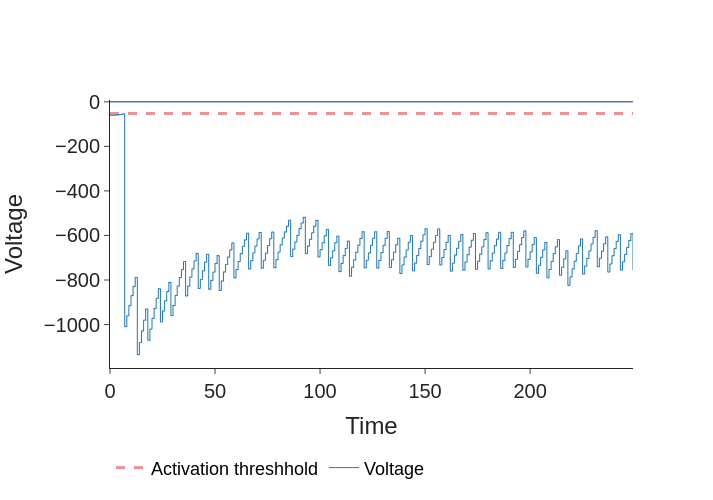

In [115]:
fig

In [116]:
fig.write_image('misc//bad_voltage.pdf')
fig.write_image('misc//bad_voltage.svg')

fig.layout.xaxis.title.text = 'Время, мс'
fig.layout.yaxis.title.text = 'Напряжение, мВ'
fig.data[0].name = 'Порог активации'
fig.data[-1].name = 'Моменты спайков нейрона'
fig.data[-2].name = 'Потенциал нейрона'

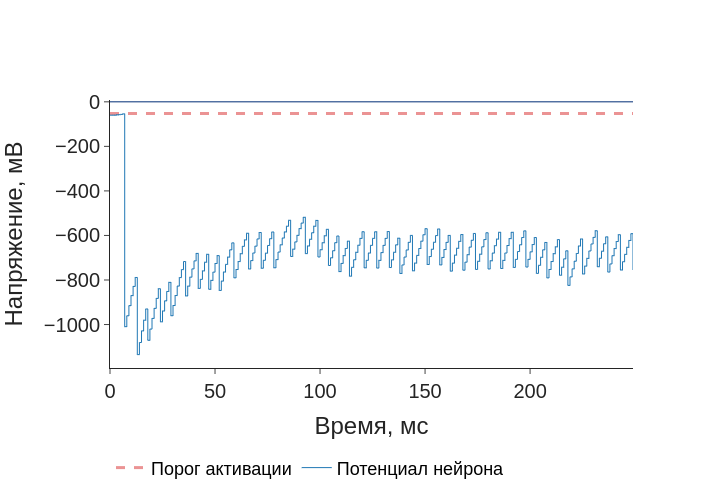

In [117]:
fig

In [118]:
fig.write_image(f'misc//bad_voltage_ru.pdf')
fig.write_image(f'misc//bad_voltage_ru.svg')

fig.write_image('misc//bad_voltage_ru.pdf')
fig.write_image('misc//bad_voltage_ru.svg')

In [119]:
reset = net.network.layers['Y'].reset
rest = net.network.layers['Y'].rest
thresh = net.network.layers['Y'].thresh
time_max = net.time_max
title_text = ''
index = net.best_voters.indices[0]
index = net.location_to_index([index, 0, 0])
v = (
    net.voltages['Y']
    .get("v")
    .squeeze(1)
    .view(time_max, -1)[:, index]
)

spike_timings = (
    net.spikes['Y']
    .get("s")
    .squeeze(1)
    .view(time_max, -1)[:, index]
    .nonzero()
    .squeeze(1)
)

threshes = []
theta = 0
tc_theta_decay = net.network.layers['Y'].theta_decay
theta_plus = net.network.layers['Y'].theta_plus
spikes = net.spikes['Y'].get('s').squeeze(1).view(250, -1)[:, index]

for s in spikes:
    theta *= tc_theta_decay
    if s:
        theta += theta_plus
    threshes.append(thresh + theta)
    
v[spike_timings] = torch.tensor(threshes)[spike_timings - 1]
subplot_voltage = go.Scatter(
    x=list(range(time_max)),
    y=v,
    line=dict(color=colors[0], width=1),
    mode="lines", line_shape='hv'
)

subplot_spikes = go.Scatter(
    x=spike_timings,
    y=torch.tensor(threshes)[spike_timings - 1],
    mode="markers",
    marker=dict(color=colors[1]),
)

fig = go.Figure()
fig.update_layout(layout, template=template)
fig.update_layout(
    legend_orientation='h', legend_font_size=18,
    title_text=title_text,
    xaxis_title_text="Time",
    yaxis_title_text="Voltage",
)
fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                         line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name = 'Activation threshhold',
                         line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
fig.add_trace(go.Scatter(x=[0, time_max], y=[rest, rest],name='Resting potential',
                                 line=dict(color=colors[4], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))


fig.add_trace(subplot_voltage)
fig.data[-1].name = 'Voltage'
fig.add_trace(subplot_spikes)
fig.data[-1].name = 'Spikes'

fig.layout.legend.y = -0.3
fig.layout.legend.x = 0
fig.layout.showlegend = True

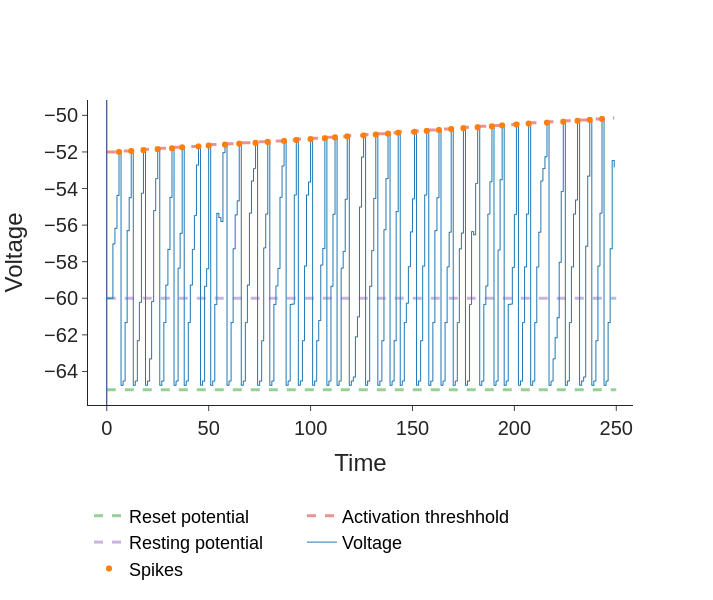

In [120]:
fig.update_layout(height=600, width=900)

In [121]:
fig.write_image('misc//bad_voltage.pdf')
fig.write_image('misc//bad_voltage.svg')

fig.layout.xaxis.title.text = 'Время, мс'
fig.layout.yaxis.title.text = 'Напряжение, мВ'
fig.data[0].name = 'Уровень сброса'
fig.data[1].name = 'Порог активации'
fig.data[2].name = 'Уровень релаксации'
fig.data[-1].name = 'Моменты спайков нейрона'
fig.data[-2].name = 'Потенциал нейрона'

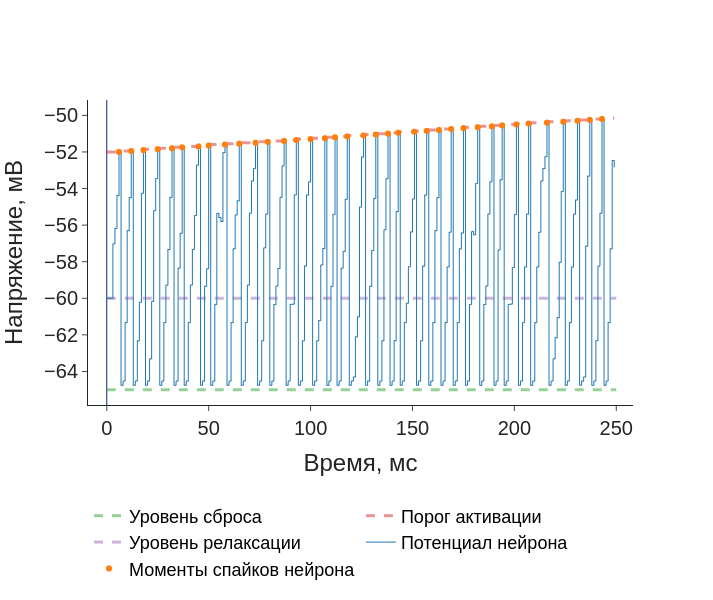

In [122]:
fig

In [123]:
fig.write_image(f'misc//good_voltage_ru.pdf')
fig.write_image(f'misc//good_voltage_ru.svg')

fig.write_image('misc//good_voltage_ru.pdf')
fig.write_image('misc//good_voltage_ru.svg')

In [124]:
data = view_database()
data = data[data['c_l'] == True]
data = data[data['n_filters'] == 25]
data = data.sort_values('accuracy', ascending=False)
name = data['name'].iloc[0]

Expecting value: line 1 column 1 (char 0)


In [125]:
net = load_network(name)

Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [126]:
fig = net.competition_distribution()[1]

In [127]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig.layout.xaxis.range = [-700, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '3808b000-43aa-4453-87ea-bd682ee27ac0',…

In [128]:
fig.write_image('misc//competition_distribution_base.pdf')
fig.write_image('misc//competition_distribution_base.svg')

In [129]:
fig.layout.title.text = f'Точность: {net.accuracy}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [130]:
fig.write_image('misc//competition_distribution_base_ru.pdf')
fig.write_image('misc//competition_distribution_base_ru.svg')

In [131]:
data = view_database()
best_25_network = data[data["n_filters"] == 25].sort_values("accuracy", ascending=False)["name"].iloc[0]
net = load_network(best_25_network)

Expecting value: line 1 column 1 (char 0)
Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [132]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY_25_best.pdf')
fig.write_image('misc//weights_XY_25_best.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_25_best_ru.pdf')
fig.write_image('misc//weights_XY_25_best_ru.svg')

fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [133]:
fig = net.competition_distribution()[1]

In [134]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {round(net.accuracy - 0.134, 3)}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'deeabc66-eed8-4ca0-b8ea-efb4c60c1a3f',…

In [135]:
fig.write_image('misc//competition_distribution_clamp_low.pdf')
fig.write_image('misc//competition_distribution_clamp_low.svg')

In [136]:
fig.layout.title.text = f'Точность: {round(net.accuracy, 3)}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [137]:
fig.write_image('misc//competition_distribution_clamp_low_ru.pdf')
fig.write_image('misc//competition_distribution_clamp_low_ru.svg')

In [53]:
net = load_network("25_clamp_low")

Created LC_SNN network 25_clamp_low with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 5000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': True}



In [54]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY_clamp_low.pdf')
fig.write_image('misc//weights_XY_clamp_low.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_clamp_low_ru.pdf')
fig.write_image('misc//weights_XY_clamp_low_ru.svg')

fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [55]:
fig = net.competition_distribution()[1]

In [56]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy:.1%}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig.layout.xaxis.range = [-700, -100]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'fdbfc206-fe78-426b-99a6-778cae9a2828',…

In [57]:
fig.write_image('misc//competition_distribution_clamp_low.pdf')
fig.write_image('misc//competition_distribution_clamp_low.svg')

In [58]:
fig.layout.title.text = f'Точность: {net.accuracy:.1%}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [59]:
fig.write_image('misc//competition_distribution_clamp_low_ru.pdf')
fig.write_image('misc//competition_distribution_clamp_low_ru.svg')

In [46]:
net = load_network("25_clamp_high")

Created LC_SNN network 25_clamp_high with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 5000, 'c_w': -100, 'c_w_min': -350, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': True}



In [47]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY_clamp_high.pdf')
fig.write_image('misc//weights_XY_clamp_high.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_clamp_high_ru.pdf')
fig.write_image('misc//weights_XY_clamp_high_ru.svg')

fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [48]:
fig = net.competition_distribution()[1]

In [49]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy:.1%}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
# fig.layout.xaxis.range = [-, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '32baf817-c1fb-48cd-82bb-aa6ced938aa1',…

In [50]:
fig.write_image('misc//competition_distribution_clamp_high.pdf')
fig.write_image('misc//competition_distribution_clamp_high.svg')

In [51]:
fig.layout.title.text = f'Точность: {net.accuracy:.1%}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [52]:
fig.write_image('misc//competition_distribution_clamp_high_ru.pdf')
fig.write_image('misc//competition_distribution_clamp_high_ru.svg')